In [1]:
import pandas as pd


In [2]:
df=pd.read_csv("C:/Users/shahc/Desktop/Pandas/salaries.csv",)
df.head()

,company,job,degree,salary_more_then_100k,delete
0,google,sales executive,bachelors,0,NaN
1,google,sales executive,masters,0,NaN
2,google,business manager,bachelors,1,NaN
3,google,business manager,masters,1,NaN
4,google,computer programmer,bachelors,0,NaN


In [3]:
df2=df.drop('delete',axis='columns')
df2

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [4]:
inputs=df2.drop('salary_more_then_100k',axis='columns')
target=df2['salary_more_then_100k']

In [5]:
from sklearn.preprocessing import LabelEncoder
leCompany=LabelEncoder()
leJob=LabelEncoder()
leDegree=LabelEncoder()

In [6]:
inputs['company_n']=leCompany.fit_transform(inputs['company'])
inputs['job_n']= leJob.fit_transform(inputs['job'])
inputs['degree_n']= leDegree.fit_transform(inputs['degree'])

inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [7]:
inputs_n=inputs.drop(['company','job','degree'],axis='columns')

inputs_n.head()

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [8]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [9]:
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [10]:
model.score(inputs_n,target)

1.0

In [11]:
model.predict([[2,1,0]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [12]:
#svm

In [13]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [14]:
iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
df0=df[:50]
df1=df[51:100]
df2=df[100:]

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

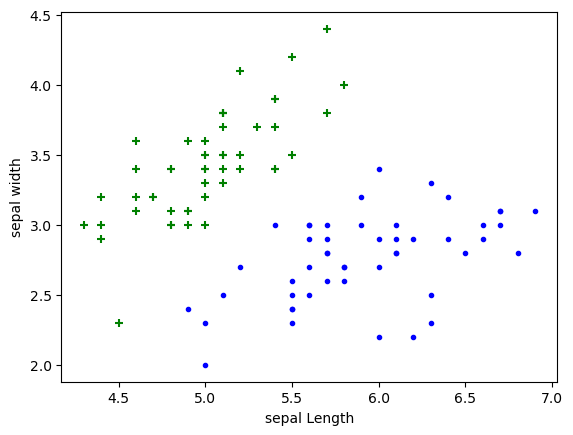

In [20]:
plt.xlabel('sepal Length')
plt.ylabel('sepal width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color="green", marker="+")
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color="blue", marker=".")
#plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color="red", marker="*")

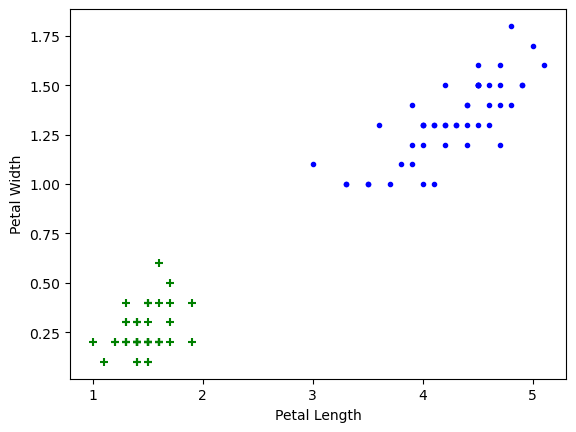

In [21]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker=".")

In [22]:
#using SVM

from sklearn.model_selection import train_test_split as train 

In [25]:
a=df.drop(['target'],axis='columns')
b=df.target

In [26]:
a_train,a_test,b_train,b_test=train(a,b,test_size=0.2)

In [27]:
len(a_train)

120

In [28]:
len(a_test)

30

In [31]:
from sklearn.svm import SVC
model =SVC()

In [33]:
model.fit(a_train,b_train)

SVC()

In [34]:
model.score(a_test,b_test)

0.9666666666666667

In [35]:
model.predict([[4.8,3.0,1.5,0.3]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [37]:
#tuning paramenters
#1.gamma

model_c=SVC(C=1)
model_c.fit(a_train,b_train)
model_c.score(a_train,b_train)




0.9666666666666667

In [38]:
#2.Kernel
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(a_train, b_train)
model_linear_kernal.score(a_test, b_test)

1.0

In [ ]:
#practise


In [39]:
from sklearn.datasets import load_digits
digits = load_digits()

In [42]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [43]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [44]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [47]:
df=pd.DataFrame(digits.data,digits.target)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [48]:
df['target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [54]:
from sklearn.model_selection import train_test_split
q_train, q_test, w_train, w_test = train_test_split(df.drop('target',axis='columns'), df.target, test_size=0.3)


In [51]:
from sklearn.svm import SVC
rbf_model = SVC(kernel='rbf')

In [55]:
rbf_model.fit(q_train, w_train)

SVC()

In [56]:
rbf_model.score(q_train, w_train)

0.9968178202068417

In [57]:
linear_model = SVC(kernel='linear')
linear_model.fit(X_train,y_train)

SVC(kernel='linear')

In [58]:
linear_model.score(X_test,y_test)

0.975925925925926